<a href="https://colab.research.google.com/github/MoonlightO2/UK-Weather-Engineering-Analysis-/blob/main/UK_Weather_(Data_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UK Weather (Data Analysis)**

### *Datasets*:
**weather_csv** = '/content/drive/MyDrive/2. MSc/Colab Notebooks/Portfolio/Daily task - Web Scraping News - Data Analysis/World Weather Data Collection/World Weather.csv'

**locations_csv** = '/content/drive/MyDrive/2. MSc/Colab Notebooks/Portfolio/Daily task - Web Scraping News - Data Analysis/World Weather Data Collection/World Locations.csv'

In [13]:
weather_csv = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Daily task - Web Scraping News - Data Analysis/World Weather Data Collection/UK Weather.csv'
locations_csv = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Daily task - Web Scraping News - Data Analysis/World Weather Data Collection/UK Locations.csv'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [15]:
df = pd.read_csv(weather_csv)

In [16]:
df.head()

,Date,Time,City,Latitude,Longitude,Temperature,Humidity,Precipitation,Wind Speed
0,2023-12-22,00:33:18,Abbots Langley,51.7057,-0.4176,9.30,73,0.00,7.20
1,2023-12-22,00:33:18,Aberaman,51.7004,-3.4290,9.98,89,0.00,11.06
2,2023-12-22,00:33:18,Aberbargoed,51.6965,-3.2219,9.18,87,0.12,10.54
3,2023-12-22,00:29:21,Aberdeen,57.1437,-2.0981,3.81,84,0.12,5.14
4,2023-12-22,00:33:19,Abingdon,51.6711,-1.2828,9.93,78,0.00,5.14


In [17]:
# Convert the 'Date' and 'Time' columns to datetime format
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

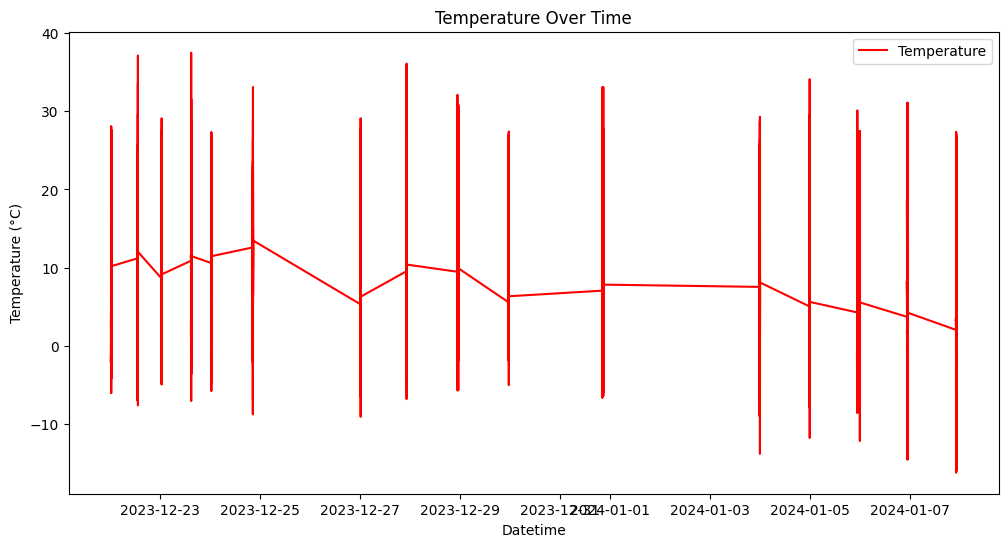

In [18]:
# Plot temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Temperature'], label='Temperature', color='red')
plt.title('Temperature Over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

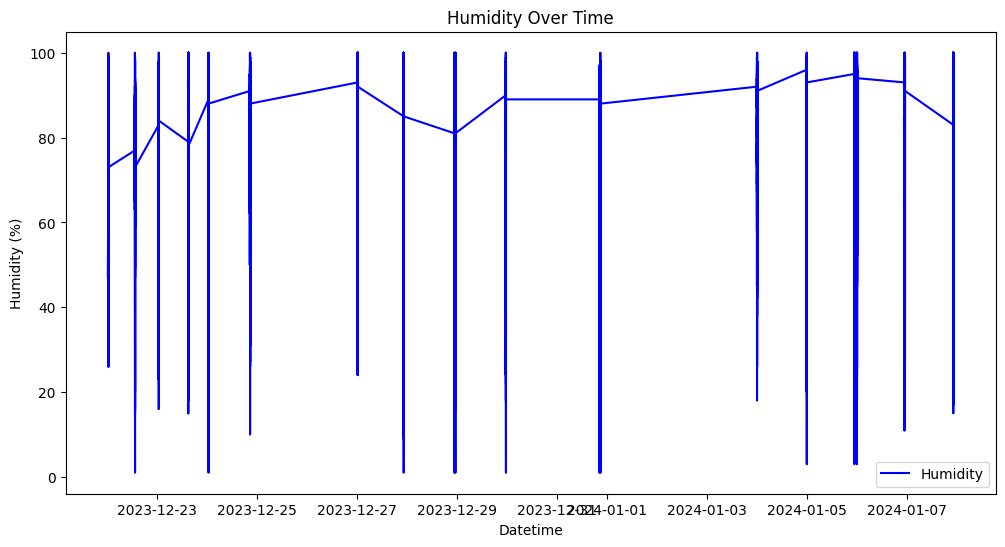

In [19]:
# Plot humidity over time
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Humidity'], label='Humidity', color='blue')
plt.title('Humidity Over Time')
plt.xlabel('Datetime')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()

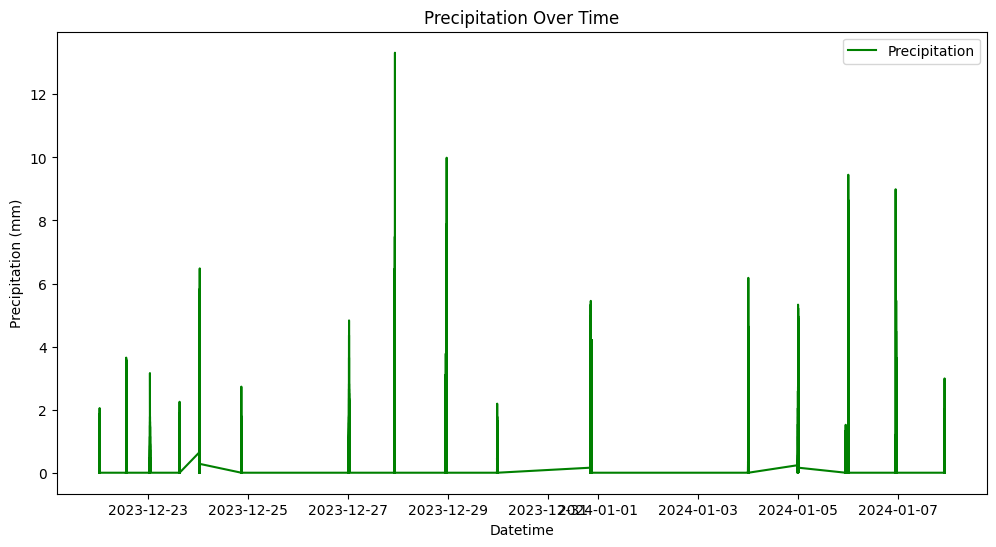

In [20]:
# Plot precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Precipitation'], label='Precipitation', color='green')
plt.title('Precipitation Over Time')
plt.xlabel('Datetime')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

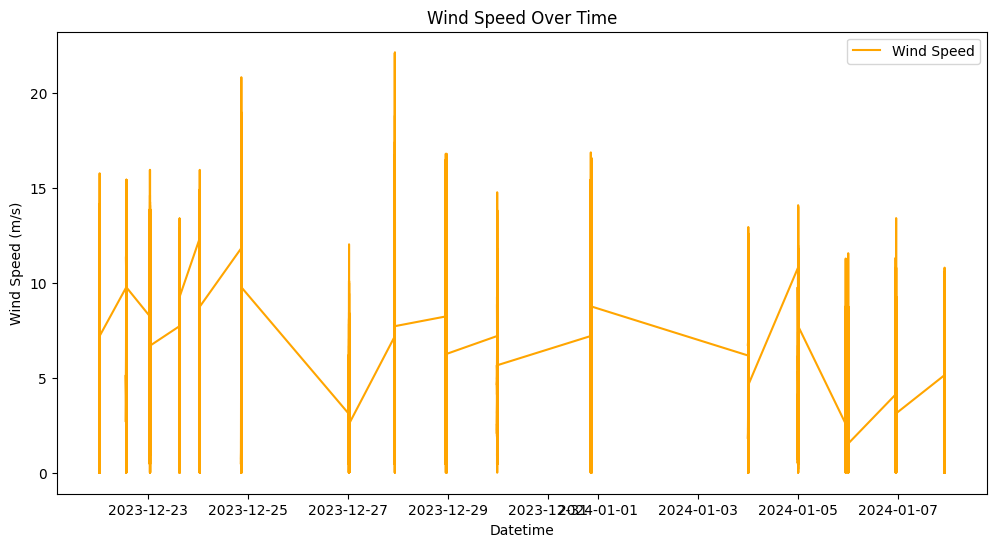

In [21]:
# Plot wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Wind Speed'], label='Wind Speed', color='orange')
plt.title('Wind Speed Over Time')
plt.xlabel('Datetime')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

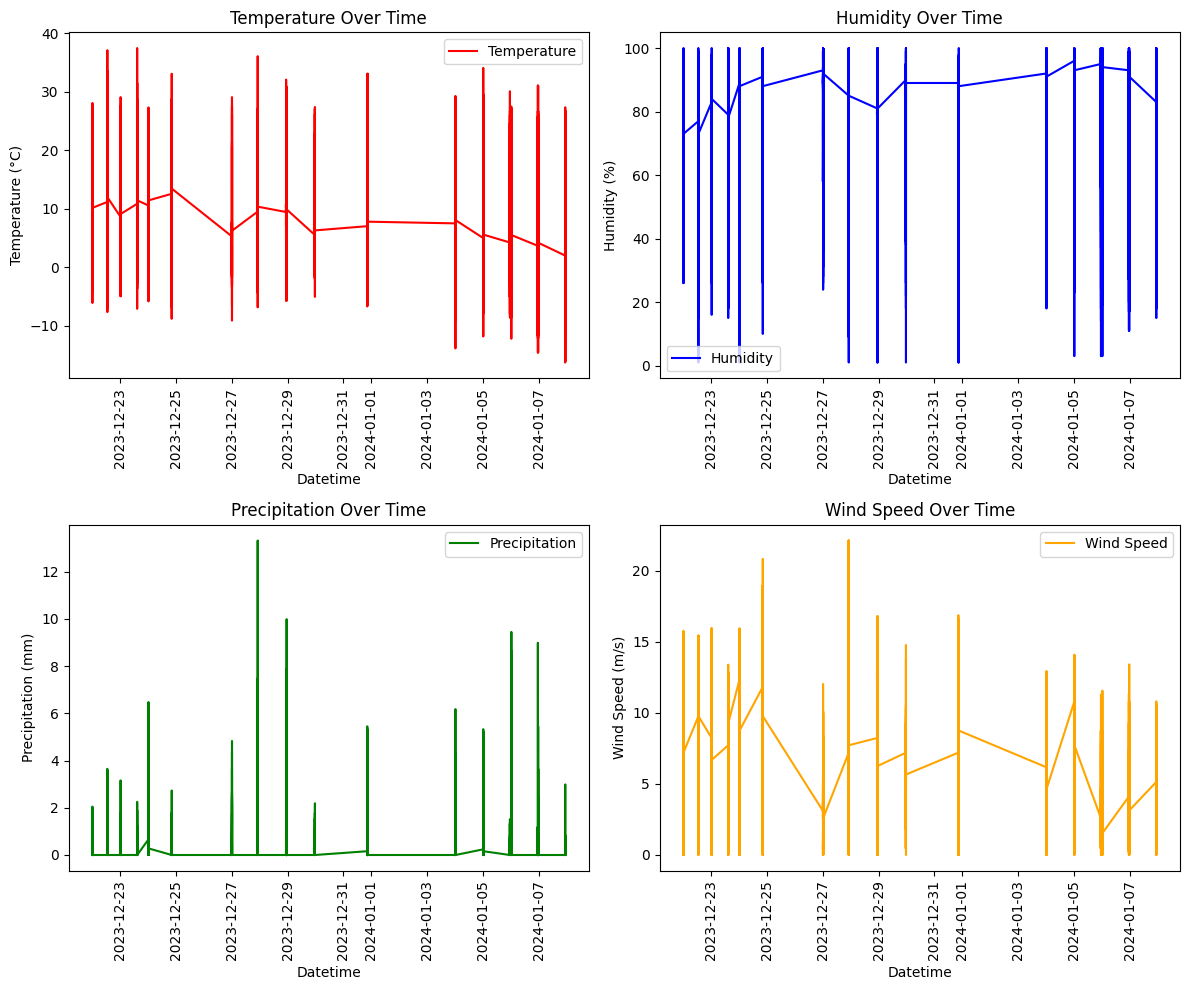

In [22]:
# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot temperature over time
axs[0, 0].plot(df['Datetime'], df['Temperature'], label='Temperature', color='red')
axs[0, 0].set_title('Temperature Over Time')
axs[0, 0].set_xlabel('Datetime')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].legend()

# Plot humidity over time
axs[0, 1].plot(df['Datetime'], df['Humidity'], label='Humidity', color='blue')
axs[0, 1].set_title('Humidity Over Time')
axs[0, 1].set_xlabel('Datetime')
axs[0, 1].set_ylabel('Humidity (%)')
axs[0, 1].legend()

# Plot precipitation over time
axs[1, 0].plot(df['Datetime'], df['Precipitation'], label='Precipitation', color='green')
axs[1, 0].set_title('Precipitation Over Time')
axs[1, 0].set_xlabel('Datetime')
axs[1, 0].set_ylabel('Precipitation (mm)')
axs[1, 0].legend()

# Plot wind speed over time
axs[1, 1].plot(df['Datetime'], df['Wind Speed'], label='Wind Speed', color='orange')
axs[1, 1].set_title('Wind Speed Over Time')
axs[1, 1].set_xlabel('Datetime')
axs[1, 1].set_ylabel('Wind Speed (m/s)')
axs[1, 1].legend()

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.tick_params(axis='x', rotation=90)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

### **Plot temperature for the top 10 highest temperature locations**

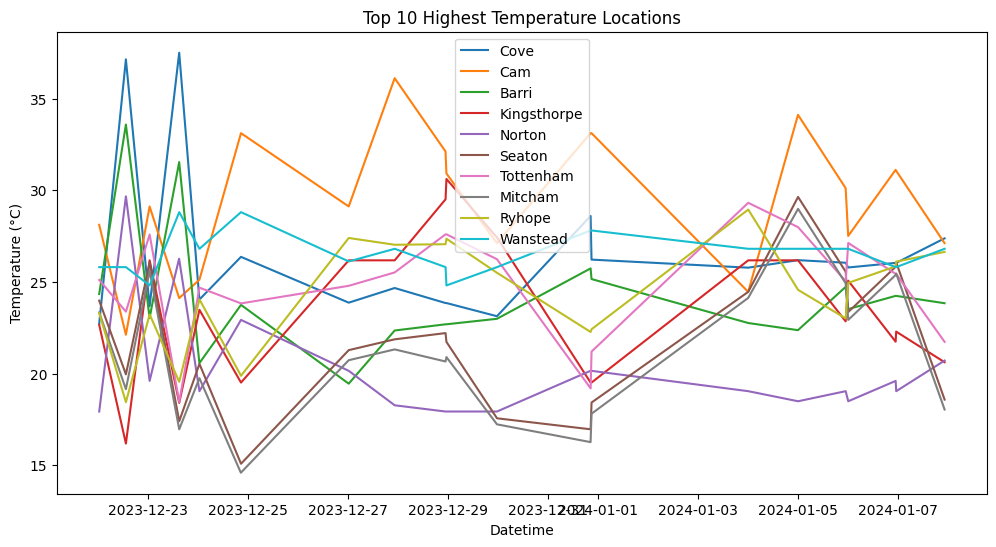

In [23]:
# Find top 10 highest temperature locations
top_10_highest_temp = df.groupby('City')['Temperature'].max().nlargest(10).index

# Plot temperature for the top 10 highest temperature locations
plt.figure(figsize=(12, 6))
for city in top_10_highest_temp:
    city_data = df[df['City'] == city]
    plt.plot(city_data['Datetime'], city_data['Temperature'], label=city)

plt.title('Top 10 Highest Temperature Locations')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

### **Plot temperature for the top 10 lowest temperature locations**

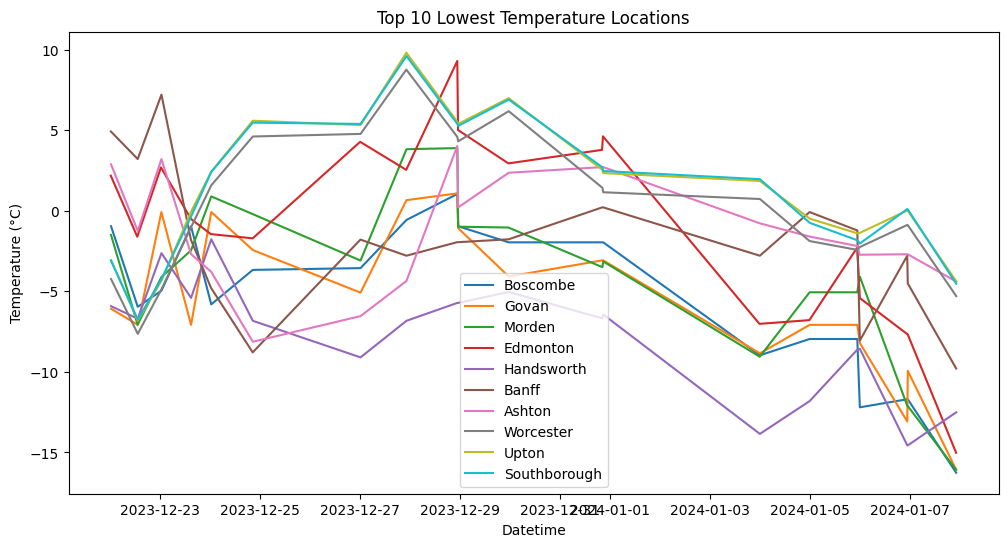

In [24]:
# Find top 10 lowest temperature locations
top_10_lowest_temp = df.groupby('City')['Temperature'].min().nsmallest(10).index

# Plot temperature for the top 10 lowest temperature locations
plt.figure(figsize=(12, 6))
for city in top_10_lowest_temp:
    city_data = df[df['City'] == city]
    plt.plot(city_data['Datetime'], city_data['Temperature'], label=city)

plt.title('Top 10 Lowest Temperature Locations')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

Enter the city name: Coventry


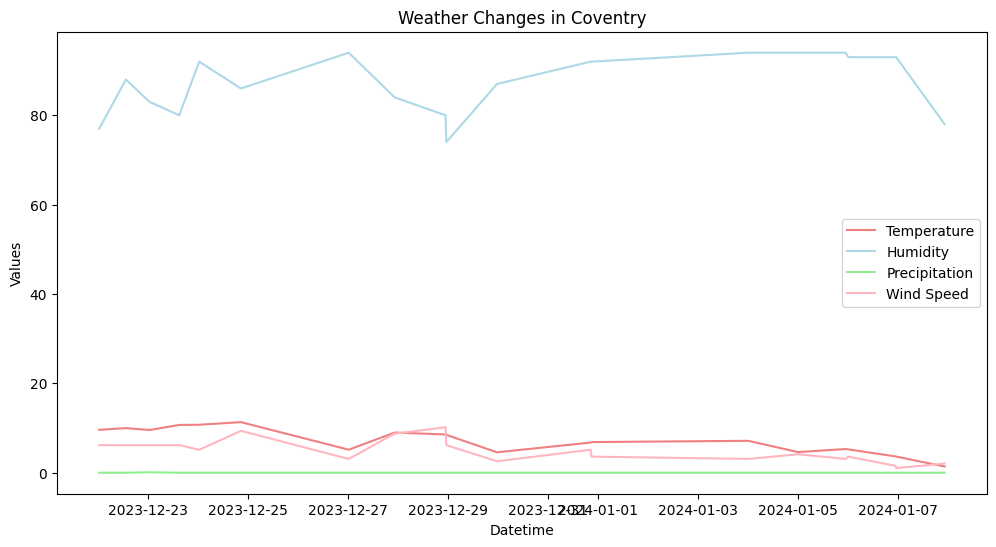

In [29]:
# Assuming your dataset has a 'City' column
city_name = input("Enter the city name: ")

# Filter the dataset based on the input city
city_data = df[df['City'] == city_name]

# Convert 'Date' and 'Time' columns to datetime and create a 'Datetime' column
city_data = city_data.copy()  # Create a copy to avoid the SettingWithCopyWarning
city_data['Datetime'] = pd.to_datetime(city_data['Date'] + ' ' + city_data['Time'])

# Check if there is data for the specified city
if city_data.empty:
    print(f"No data found for {city_name}. Please check the city name.")
else:
    # Convert 'Date' and 'Time' columns to datetime and create a 'Datetime' column
    city_data['Datetime'] = pd.to_datetime(city_data['Date'] + ' ' + city_data['Time'])

    # Plotting with pastel colors
    plt.figure(figsize=(12, 6))

    plt.plot(city_data['Datetime'], city_data['Temperature'], label='Temperature', color='lightcoral')
    plt.plot(city_data['Datetime'], city_data['Humidity'], label='Humidity', color='lightblue')
    plt.plot(city_data['Datetime'], city_data['Precipitation'], label='Precipitation', color='lightgreen')
    plt.plot(city_data['Datetime'], city_data['Wind Speed'], label='Wind Speed', color='lightpink')

    plt.title(f'Weather Changes in {city_name}')
    plt.xlabel('Datetime')
    plt.ylabel('Values')
    plt.legend()
    plt.show()